## Feature Engineering no dataset market.csv

Realizando redução de dimensionalidade (limpeza de features) a partir do percentual de preenchimento dos dados, e de técnicas de ciência de dados

**[Dicionário de dados](https://s3-us-west-1.amazonaws.com/codenation-challenges/ml-leads/features_dictionary.pdf)**

In [1]:
# configurações de plot
# seaborn
import seaborn as sns
from IPython.core.pylabtools import figsize
figsize(12, 8)
sns.set()
# pyplot
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# analise exploratória
from scipy import stats
import statistics
# normalização e padronização
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 200)
pd.option_context('display.max_rows', None, 'display.max_columns', None)

In [3]:
df_market = pd.read_csv('market.csv', index_col=0)

In [4]:
df_market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462298 entries, 0 to 462297
Columns: 181 entries, id to qt_filiais
dtypes: bool(9), float64(144), int64(1), object(27)
memory usage: 614.1+ MB


In [5]:
df_market.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462298 entries, 0 to 462297
Columns: 181 entries, id to qt_filiais
dtypes: bool(9), float64(144), int64(1), object(27)
memory usage: 1.2 GB


In [6]:
df_market.memory_usage(index=True).sum()

643981114

In [7]:
total = df_market.isnull().sum().sort_values(ascending=False)
percent = (df_market.isnull().sum()/df_market.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total_Missing_Count', 'Percent_of_Missing'])
missing_data.index.name ='df_market'

In [8]:
missing_data

,Total_Missing_Count,Percent_of_Missing
df_market,,
qt_alteracao_socio_180d,462298,1.000000
grau_instrucao_macro_desconhecido,462298,1.000000
qt_alteracao_socio_90d,462298,1.000000
qt_alteracao_socio_365d,462298,1.000000
qt_alteracao_socio_total,462298,1.000000
coligada_mais_nova_baixada,462162,0.999706
coligada_mais_antiga_baixada,462162,0.999706
idade_media_coligadas_baixadas,462162,0.999706
vl_total_veiculos_antt,462122,0.999619


Quantidade de sócios masculino e feminino nas features `qt_socios_feminino` e `qt_socios_masculino` parecem ser features relevantes.

Features com percentual faltante acima dessas duas parecem ser hot encode no próprio dataset, e serão descartados por enquanto.

Com isso, o corte de dados faltantes será setado em 70% ou mais de valores faltantes

In [9]:
perc_miss_features = 0.7 

In [10]:
# DataFrame criado com os features que possuem menos de 70% de dados faltantes
keep_data = missing_data[missing_data['Percent_of_Missing'] < perc_miss_features]

In [11]:
keep_data.count()

Total_Missing_Count    52
Percent_of_Missing     52
dtype: int64

In [12]:
keep_data.head()

,Total_Missing_Count,Percent_of_Missing
df_market,,
qt_socios_feminino,317269,0.686287
qt_socios_masculino,267183,0.577945
qt_socios_st_regular,154917,0.335102
idade_media_socios,151602,0.327931
idade_minima_socios,151602,0.327931


In [13]:
active_columns = keep_data.index
active_columns

Index(['qt_socios_feminino', 'qt_socios_masculino', 'qt_socios_st_regular', 'idade_media_socios', 'idade_minima_socios', 'idade_maxima_socios', 'empsetorcensitariofaixarendapopulacao',
       'qt_socios_pj', 'qt_socios', 'qt_socios_pf', 'fl_optante_simples', 'fl_optante_simei', 'nm_meso_regiao', 'nm_micro_regiao', 'nu_meses_rescencia', 'vl_faturamento_estimado_grupo_aux',
       'vl_faturamento_estimado_aux', 'de_faixa_faturamento_estimado_grupo', 'de_faixa_faturamento_estimado', 'de_saude_rescencia', 'de_saude_tributaria', 'de_nivel_atividade', 'sg_uf_matriz',
       'fl_antt', 'setor', 'nm_divisao', 'nm_segmento', 'fl_spa', 'fl_passivel_iss', 'fl_veiculo', 'vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo', 'fl_simples_irregular',
       'dt_situacao', 'fl_me', 'fl_matriz', 'de_natureza_juridica', 'sg_uf', 'natureza_juridica_macro', 'de_ramo', 'idade_empresa_anos', 'idade_emp_cat', 'qt_filiais', 'fl_sa', 'fl_epp', 'fl_mei',
       'fl_ltda', 'fl_st_especial', 'fl_emai

In [14]:
df_market_ok = pd.read_csv('market.csv', index_col=0, usecols=active_columns)

### Checkpoint 1: Limpeza de dados faltantes
Até aqui, as features com acima de 70% de dados faltantes foram dropadas do dataset

In [15]:
# Guardando market ok em csv
# df_market_ok.to_csv("marketok.csv")

### Analisando as features
Análise dos tipos de dados e preenchimento das features 

In [16]:
df_market_ok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462298 entries, a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849 to 3d43e934e150b86be1e67524f5ba1018b27da9ef25566d9c0607623ae7f25e3a
Data columns (total 51 columns):
fl_matriz                                462298 non-null bool
de_natureza_juridica                     462298 non-null object
sg_uf                                    462298 non-null object
natureza_juridica_macro                  462298 non-null object
de_ramo                                  462298 non-null object
setor                                    460371 non-null object
idade_empresa_anos                       462298 non-null float64
idade_emp_cat                            462298 non-null object
fl_me                                    462298 non-null bool
fl_sa                                    462298 non-null bool
fl_epp                                   462298 non-null bool
fl_mei                                   462298 non-null bool
fl_ltda       

In [17]:
df_market_ok.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 462298 entries, a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849 to 3d43e934e150b86be1e67524f5ba1018b27da9ef25566d9c0607623ae7f25e3a
Data columns (total 51 columns):
fl_matriz                                462298 non-null bool
de_natureza_juridica                     462298 non-null object
sg_uf                                    462298 non-null object
natureza_juridica_macro                  462298 non-null object
de_ramo                                  462298 non-null object
setor                                    460371 non-null object
idade_empresa_anos                       462298 non-null float64
idade_emp_cat                            462298 non-null object
fl_me                                    462298 non-null bool
fl_sa                                    462298 non-null bool
fl_epp                                   462298 non-null bool
fl_mei                                   462298 non-null bool
fl_ltda       

In [18]:
df_market_ok.head()

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,2005-03-25,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,True,0.0,0.0,False,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,False,NaN,LESTE POTIGUAR,NATAL,True,2.0,2.0,0.0,44.0,47.0,41.0,2.0,2.0,NaN,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,False,True,False,2017-05-12,False,True,True,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False,NaN,0.0,0.0,NaN,PI,CINZA,ATE 1 ANO,9.0,BAIXA,False,468.93,CENTRO NORTE PIAUIENSE,TERESINA,True,1.0,1.0,0.0,27.0,27.0,27.0,1.0,1.0,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,False,False,True,False,2011-09-26,False,False,True,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,False,False,False,True,0.0,0.0,True,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,False,713.50,CENTRO AMAZONENSE,MANAUS,True,1.0,1.0,0.0,32.0,32.0,32.0,NaN,1.0,NaN,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,False,False,False,False,2012-04-25,False,True,True,SIM,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,False,False,False,True,0.0,0.0,False,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,False,475.73,CENTRO AMAZONENSE,MANAUS,True,1.0,1.0,0.0,36.0,36.0,36.0,1.0,1.0,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,False,False,False,False,2015-08-17,False,True,True,SIM,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,False,False,False,True,0.0,0.0,False,RN,VERDE,ACIMA DE 1 ANO,27.0,ALTA,False,2874.04,LESTE POTIGUAR,NATAL,True,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0


### Distribuição das features
Verificando a distribuição das features com valores booleanos

In [19]:
# verificando se há valores object com comportamento de booleanos
df_market_obj = df_market_ok.select_dtypes(['object'])

df_market_obj.head()

# sim ou não
# df_market_obj.fl_rm.unique()
df_market_obj.fl_rm = (df_market_obj.fl_rm == 'SIM').astype(int)

# true, false ou nan
cols_bool = [
        'fl_spa', 
        'fl_antt', 
        'fl_veiculo', 
        'fl_optante_simples', 
        'fl_optante_simei', 
        'fl_simples_irregular', 
        'fl_passivel_iss'
       ]

for col in cols_bool:
    df_market_obj[col] = (df_market_obj[col] == True).astype(int)

cols_bool.append('fl_rm')    

# dataframe pronto, com valores inteiros 0 ou 1
df_market_obj = df_market_obj[cols_bool].copy()

# df_market_obj.fl_spa.unique()
# df_market_obj.fl_antt.unique()
# df_market_obj.fl_veiculo.unique()
# df_market_obj.fl_optante_simples.unique()
# df_market_obj.fl_optante_simei.unique()
# df_market_obj.fl_simples_irregular.unique()
# df_market_obj.fl_passivel_iss.unique()

df_market_obj.head()

/home/tiago/.local/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/tiago/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,fl_optante_simei,fl_simples_irregular,fl_passivel_iss,fl_rm
id,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,0,0,0,1,0,0,1,1
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,0,0,0,0,0,0,1,1
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,0,0,0,1,1,0,1,1
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,0,0,0,1,0,0,1,1
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,0,0,0,1,0,0,1,1


In [20]:
# booleanos
df_market_bool = df_market_ok.select_dtypes(['bool'])

# verificando se há nulos
df_market_bool.info()
# print(df_market_bool.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 462298 entries, a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849 to 3d43e934e150b86be1e67524f5ba1018b27da9ef25566d9c0607623ae7f25e3a
Data columns (total 9 columns):
fl_matriz         462298 non-null bool
fl_me             462298 non-null bool
fl_sa             462298 non-null bool
fl_epp            462298 non-null bool
fl_mei            462298 non-null bool
fl_ltda           462298 non-null bool
fl_st_especial    462298 non-null bool
fl_email          462298 non-null bool
fl_telefone       462298 non-null bool
dtypes: bool(9)
memory usage: 7.5+ MB


In [21]:
# como não há nulos, podemos converter para int
for col in df_market_bool:
    df_market_bool[col] = df_market_bool[col].astype(int)

# df_market_bool.head()

/home/tiago/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# merge do dataframe de objetos "booleanos" com dataframe booleano
df_market_bool = pd.merge(df_market_bool, df_market_obj, left_index=True, right_index=True)

df_market_bool.head()

,fl_matriz,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,fl_optante_simei,fl_simples_irregular,fl_passivel_iss,fl_rm
id,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,1
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1


/home/tiago/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


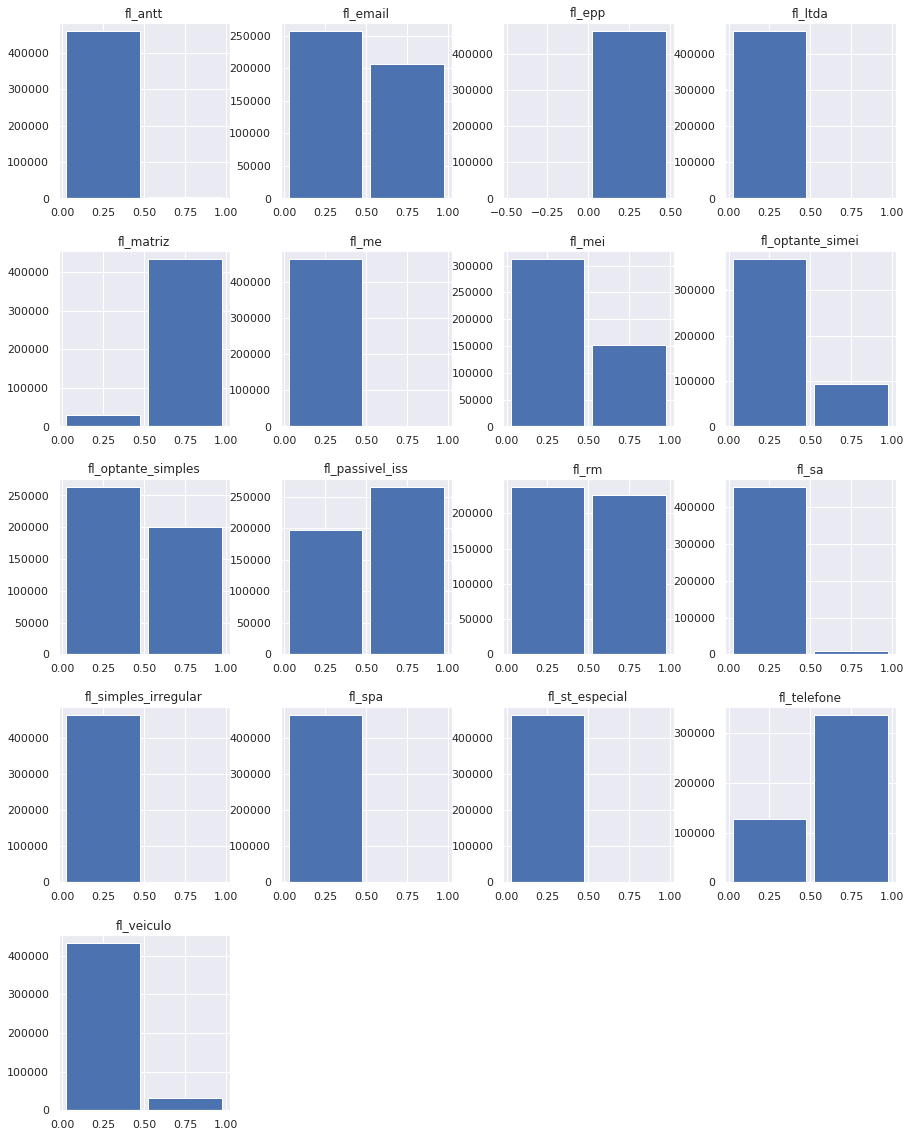

In [23]:
# plot histograma    
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_market_bool.hist(grid=True, bins=2, rwidth=0.9, ax=ax) 
plt.show()

In [24]:
# dropando features booleanas antigas do dataset ok
cols = list(df_market_bool.columns)
# cols.remove('key_0')

df_market_ok.drop(cols, inplace=True, axis=1)


In [25]:
# merge do dataset ok com dataset bool
df_market_ok = pd.merge(df_market_ok, df_market_bool, left_index=True, right_index=True)
df_market_ok.head()

,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,fl_optante_simei,fl_simples_irregular,fl_passivel_iss,fl_rm
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,2005-03-25,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,0.0,0.0,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,NaN,LESTE POTIGUAR,NATAL,2.0,2.0,0.0,44.0,47.0,41.0,2.0,2.0,NaN,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,2017-05-12,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,0.0,0.0,PI,CINZA,ATE 1 ANO,9.0,BAIXA,468.93,CENTRO NORTE PIAUIENSE,TERESINA,1.0,1.0,0.0,27.0,27.0,27.0,1.0,1.0,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,2011-09-26,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,0.0,0.0,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,713.50,CENTRO AMAZONENSE,MANAUS,1.0,1.0,0.0,32.0,32.0,32.0,NaN,1.0,NaN,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,1
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,2012-04-25,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,0.0,0.0,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,475.73,CENTRO AMAZONENSE,MANAUS,1.0,1.0,0.0,36.0,36.0,36.0,1.0,1.0,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,2015-08-17,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,0.0,0.0,RN,VERDE,ACIMA DE 1 ANO,27.0,ALTA,2874.04,LESTE POTIGUAR,NATAL,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1


Criando um dataframe com o percentual de true/false das features booleanas

In [26]:
df_perc_bool = pd.DataFrame(columns=['feature', 'perc'])

i = 0

# iterando pelo dataframe de booleanos
for col in df_market_bool:
    
    # percentual de true da feature
    perc_true = df_market_bool[col].sum() / df_market_bool[col].count()
    
    # adicionando a feature e o seu percentual de true no dataframe df_perc_bool
    df_perc_bool.loc[i] = [col] + [perc_true]
    
    i += 1
    
df_perc_bool.sort_values(by=['perc'])

,feature,perc
3,fl_epp,0.000000
6,fl_st_especial,0.000147
9,fl_spa,0.000606
14,fl_simples_irregular,0.000738
1,fl_me,0.002628
5,fl_ltda,0.002687
10,fl_antt,0.007086
2,fl_sa,0.018239
11,fl_veiculo,0.066373
13,fl_optante_simei,0.203419


Definindo o intervalo de percentual de true das features:
- acima de 0.94 
- ou abaixo de 0.03

In [27]:
perc_true_max = 0.94
perc_true_min = 0.03

In [28]:
def out_perc_range(perc):
    """
    Verifica se o percentual de true está fora do 
    intervalo definido.
    
    Retorno:
    True se esta fora do intervalo, caso contrário, false
    """
    if perc > perc_true_max or perc < perc_true_min:
        return True
    
    return False

Dropando as features com os percentuais de true definidos

In [29]:
# criando lista com as colunas a serem dropadas
drop_cols = []

for row in range( len(df_perc_bool) ):
    if out_perc_range( df_perc_bool.loc[row].perc ):
        drop_cols.append( df_perc_bool.loc[row].feature )
        
drop_cols
        

['fl_me',
 'fl_sa',
 'fl_epp',
 'fl_ltda',
 'fl_st_especial',
 'fl_spa',
 'fl_antt',
 'fl_simples_irregular']

In [30]:
# dropando colunas com true fora do intervalo definido
df_market_ok.drop(drop_cols, axis=1, inplace=True)

In [31]:
# verificando shape do dataset
df_market_ok.shape

(462298, 43)

### Checkpoint 2: Conversão de booleanos para inteiros
- Os dados booleanos e string caracterizadas como booleanos foram convertidos para inteiros (0 ou 1)
- Features com valores majoritariamente true ou false foram dropadas do dataset

In [32]:
# Guardando market ok em csv
# df_market_ok.to_csv("marketok.csv")

### Análise de correlação

In [33]:
corr = df_market_ok.corr()  

In [34]:
corr.columns.str[:10]

Index(['idade_empr', 'vl_total_v', 'vl_total_v', 'nu_meses_r', 'empsetorce', 'qt_socios', 'qt_socios_', 'qt_socios_', 'idade_medi', 'idade_maxi', 'idade_mini', 'qt_socios_', 'qt_socios_',
       'qt_socios_', 'vl_faturam', 'vl_faturam', 'qt_filiais', 'fl_matriz', 'fl_mei', 'fl_email', 'fl_telefon', 'fl_veiculo', 'fl_optante', 'fl_optante', 'fl_passive', 'fl_rm'],
      dtype='object')

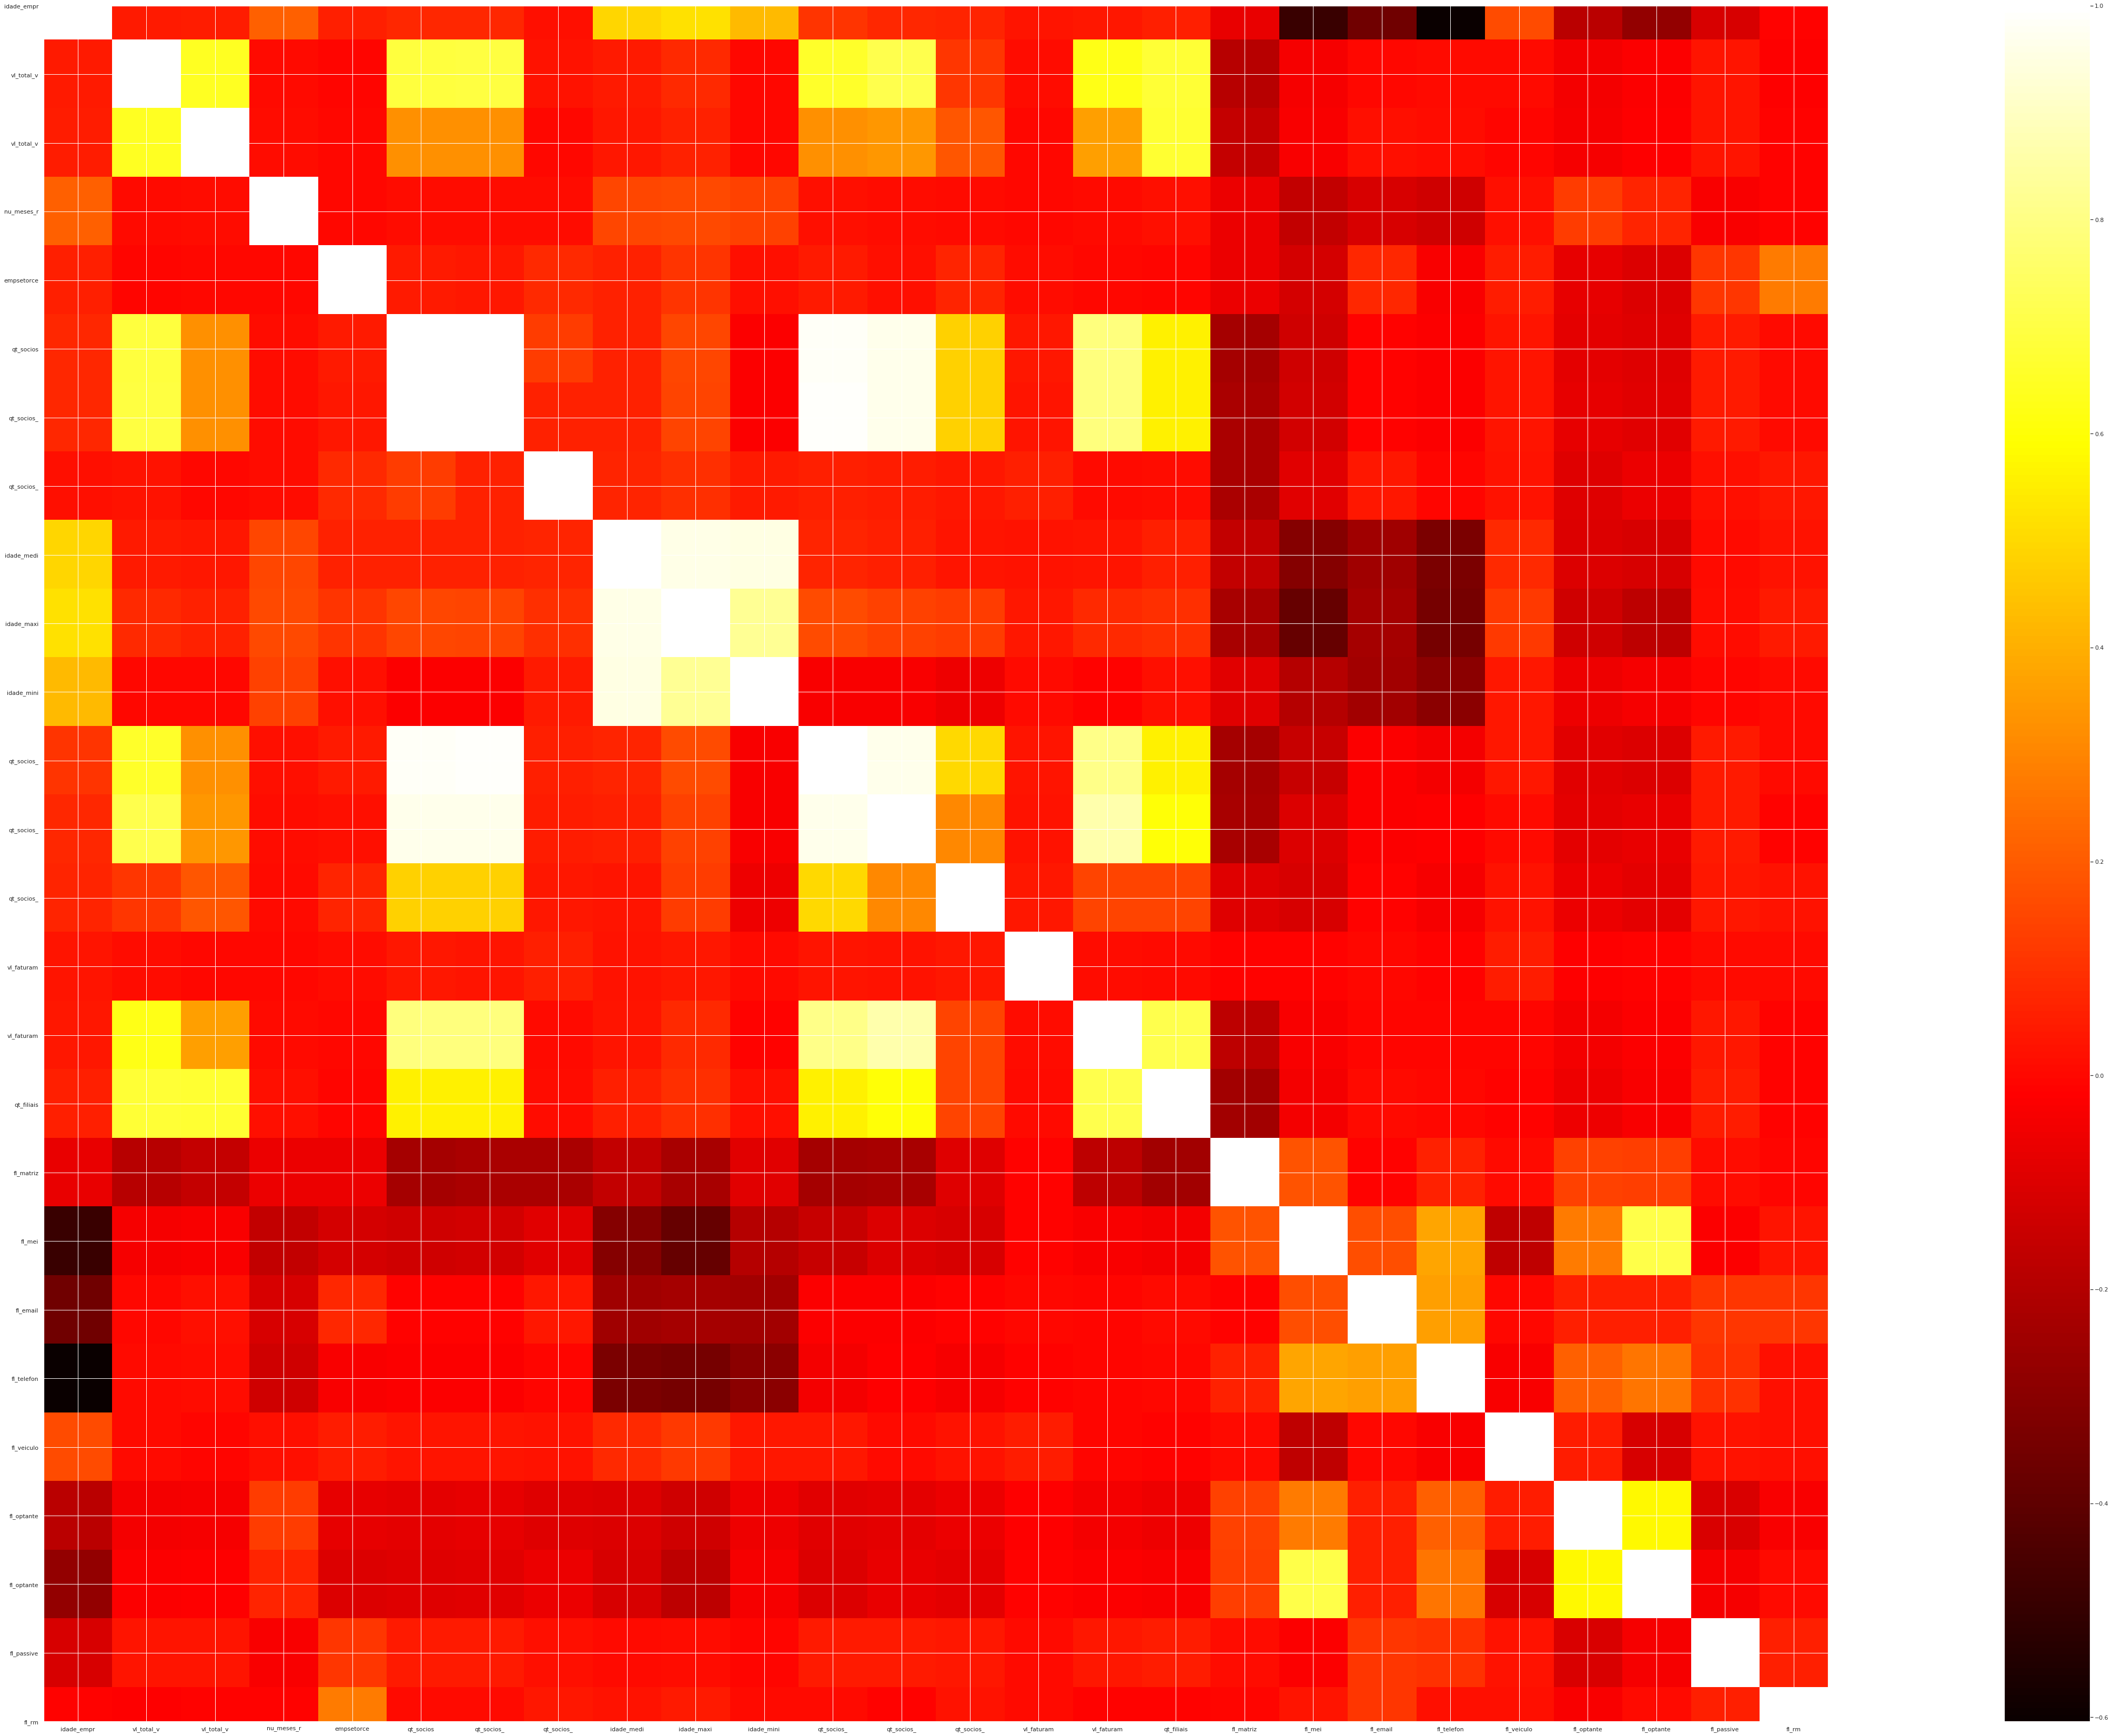

In [35]:
# plotando matriz de correlação
figsize(120, 60)
plt.imshow(corr, cmap='hot', interpolation='none')  
plt.colorbar()  
plt.xticks(range(len(corr)), corr.columns.str[:10])  
plt.yticks(range(len(corr)), corr.columns.str[:10])  
plt.savefig("correl.png")  
plt.show()  

In [36]:
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
corr_triu = corr_triu.stack()
corr_triu.name = 'Pearson Correlation Coefficient'
corr_triu.index.names = ['Col1', 'Col2']

corr_triu[corr_triu > 0.85].to_frame()

Pearson Correlation Coefficient
Col1                 Col2                                                              
qt_socios            qt_socios_pf                                              0.998232
                     qt_socios_st_regular                                      0.986359
                     qt_socios_masculino                                       0.963237
qt_socios_pf         qt_socios_st_regular                                      0.988362
                     qt_socios_masculino                                       0.965254
idade_media_socios   idade_maxima_socios                                       0.956874
                     idade_minima_socios                                       0.953359
qt_socios_st_regular qt_socios_masculino                                       0.967416
qt_socios_masculino  vl_faturamento_estimado_grupo_aux                         0.862529

As features altamente correlacionadas já serão dropadas na sequência do feature engineering.

Nenhuma ação tomada por enquanto em relação a correlação

### Trabalhando com as features  object

In [37]:
# separando os tipos object
df_market_obj = df_market_ok.select_dtypes(['object'])
df_market_obj.head()

,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,dt_situacao,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
id,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,10 a 15,2005-03-25,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,RN,VERDE,ACIMA DE 1 ANO,ALTA,LESTE POTIGUAR,NATAL,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00"
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1 a 5,2017-05-12,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,PI,CINZA,ATE 1 ANO,BAIXA,CENTRO NORTE PIAUIENSE,TERESINA,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,5 a 10,2011-09-26,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,AM,AMARELO,ACIMA DE 1 ANO,MEDIA,CENTRO AMAZONENSE,MANAUS,"ATE R$ 81.000,00","ATE R$ 81.000,00"
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,5 a 10,2012-04-25,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,AM,AMARELO,ACIMA DE 1 ANO,MEDIA,CENTRO AMAZONENSE,MANAUS,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,1 a 5,2015-08-17,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ...,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,RN,VERDE,ACIMA DE 1 ANO,ALTA,LESTE POTIGUAR,NATAL,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00"


### Reduzindo features
De acordo com interpretação do dicionário de dados (existem algumas features que representam valores macros e micros).

Estão sendo removidos os valores micro.

Exemplo:

- Natal que é uma `nm_micro_regiao` será dropada

- LESTE POTIGUAR que é uma `nm_meso_regiao` será mantida

In [38]:
# reduzindo granularidade de dt_situacao
drop_cols = [
    'dt_situacao',        # data de registro da situação da empresa frente a receita federal
    'nm_micro_regiao',    # representa a micro região da empresa, será usada nm_meso_regiao que é mais macro
    'de_faixa_faturamento_estimado', # grande quantia de repetidos com o de_faixa_faturamento_estimado_grupo
    'nm_divisao',          # será usado nm_segmento que é mais macro
    'de_ramo',             # será usado setor que é mais macro,
    'de_natureza_juridica' # será usado natureza_juridica_macro
]

In [39]:
df_market_ok.drop(drop_cols, axis=1, inplace=True)

df_market_obj.drop(drop_cols, axis=1, inplace=True)
df_market_obj.shape

/home/tiago/.local/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(462298, 11)

### Aplicando label encode

In [40]:
# dataset para guardar valores antes do encode
df_mkt_obj_bkp = pd.DataFrame()

In [41]:
# aplicando one hot encode
label_encoder = LabelEncoder()

for col in df_market_obj:
    # guardando valor da feature original
    df_mkt_obj_bkp[col] = df_market_obj[col]
    
    # novo nome de coluna
    col_labeled = col + '_lbl'
    
    # aplicando label encode
    df_market_obj[col_labeled] = label_encoder.fit_transform(list(df_market_obj[col]))
    
    # dropando feature antes do encode
    df_market_obj.drop(col, axis=1, inplace=True)
    

df_market_obj.head()

/home/tiago/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,sg_uf_lbl,natureza_juridica_macro_lbl,setor_lbl,idade_emp_cat_lbl,nm_segmento_lbl,sg_uf_matriz_lbl,de_saude_tributaria_lbl,de_saude_rescencia_lbl,de_nivel_atividade_lbl,nm_meso_regiao_lbl,de_faixa_faturamento_estimado_grupo_lbl
id,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,4,2,2,1,10,19,4,0,0,6,2
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,3,5,4,0,3,16,2,1,1,4,10
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,1,5,4,3,20,2,0,0,2,2,1
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,1,5,4,3,17,2,0,0,2,2,10
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,4,5,4,0,8,19,4,0,0,6,10


Guardando uma lista com as features `int` e `float` para analisá-los a seguir

In [42]:
numeric_cols = list( df_market_ok.select_dtypes(['int64', 'float64']).columns )

# dropando colunas booleanas representadas por 0 e 1
for feature in list(numeric_cols):
    if feature in df_market_bool.columns:
        numeric_cols.remove(feature)
        
numeric_cols

['idade_empresa_anos',
 'vl_total_veiculos_pesados_grupo',
 'vl_total_veiculos_leves_grupo',
 'nu_meses_rescencia',
 'empsetorcensitariofaixarendapopulacao',
 'qt_socios',
 'qt_socios_pf',
 'qt_socios_pj',
 'idade_media_socios',
 'idade_maxima_socios',
 'idade_minima_socios',
 'qt_socios_st_regular',
 'qt_socios_masculino',
 'qt_socios_feminino',
 'vl_faturamento_estimado_aux',
 'vl_faturamento_estimado_grupo_aux',
 'qt_filiais']

In [43]:
# Merge do dataset ok com o label encode

# drop das features object do dataset ok
df_market_ok.drop(df_mkt_obj_bkp.columns, inplace=True, axis=1)

# merge das features object com one hot encode
df_market_ok = pd.merge(df_market_ok, df_market_obj, left_index=True, right_index=True)

df_market_ok.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais,fl_matriz,fl_mei,fl_email,fl_telefone,fl_veiculo,fl_optante_simples,fl_optante_simei,fl_passivel_iss,fl_rm,sg_uf_lbl,natureza_juridica_macro_lbl,setor_lbl,idade_emp_cat_lbl,nm_segmento_lbl,sg_uf_matriz_lbl,de_saude_tributaria_lbl,de_saude_rescencia_lbl,de_nivel_atividade_lbl,nm_meso_regiao_lbl,de_faixa_faturamento_estimado_grupo_lbl
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,14.457534,0.0,0.0,23.0,NaN,2.0,2.0,0.0,44.0,47.0,41.0,2.0,2.0,NaN,3132172.8,3132172.8,0,1,0,1,1,0,1,0,1,1,4,2,2,1,10,19,4,0,0,6,2
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1.463014,0.0,0.0,9.0,468.93,1.0,1.0,0.0,27.0,27.0,27.0,1.0,1.0,NaN,210000.0,210000.0,0,1,1,1,1,0,0,0,1,1,3,5,4,0,3,16,2,1,1,4,10
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,7.093151,0.0,0.0,26.0,713.50,1.0,1.0,0.0,32.0,32.0,32.0,NaN,1.0,NaN,50000.0,50000.0,0,1,1,0,1,0,1,1,1,1,1,5,4,3,20,2,0,0,2,2,1
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,6.512329,0.0,0.0,26.0,475.73,1.0,1.0,0.0,36.0,36.0,36.0,1.0,1.0,NaN,210000.0,210000.0,0,1,0,1,1,0,1,0,1,1,1,5,4,3,17,2,0,0,2,2,10
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,3.200000,0.0,0.0,27.0,2874.04,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,210000.0,210000.0,0,1,0,1,1,0,1,0,1,1,4,5,4,0,8,19,4,0,0,6,10


### Checkpoint 3: Conversão de todas as features para inteiros
Label encode aplicado

In [44]:
# Guardando market ok em csv
# df_market_ok.to_csv("marketok.csv")

### Preenchendo valores nulos
Para as features numericas

Gerando um dataset que contém features numéricas e com algum valor nulo

In [45]:
# Lista das features com valores nulos
cols = df_market_ok[numeric_cols].isna().any()
cols = cols[(cols == True)]
cols = list(cols.index)

# dataframe com features que contém valores nulos
df_null = df_market_ok[cols]

df_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462298 entries, a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849 to 3d43e934e150b86be1e67524f5ba1018b27da9ef25566d9c0607623ae7f25e3a
Data columns (total 15 columns):
vl_total_veiculos_pesados_grupo          460371 non-null float64
vl_total_veiculos_leves_grupo            460371 non-null float64
nu_meses_rescencia                       417022 non-null float64
empsetorcensitariofaixarendapopulacao    318469 non-null float64
qt_socios                                347207 non-null float64
qt_socios_pf                             347207 non-null float64
qt_socios_pj                             347207 non-null float64
idade_media_socios                       310696 non-null float64
idade_maxima_socios                      310696 non-null float64
idade_minima_socios                      310696 non-null float64
qt_socios_st_regular                     307381 non-null float64
qt_socios_masculino                      195115 non-null f

Analisando a distribuição das features numéricas

In [46]:
# função para plot histograma & boxplot

def plot_box_hist(df):
    """
        Plota boxplot e histograma em uma mesma visualização.
        
        Itera sobre um dataframe para realizar o plot de cada features do dataframe
        
        Parametro:
        Dataframe a ser iterado
        
    """
    sns.set(style="ticks")

    for col in df:
        figsize(12, 8)
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .45)})

        temp = df_null[col].dropna()

        sns.boxplot(temp, ax=ax_box)
        sns.distplot(temp, ax=ax_hist)

        ax_box.set(yticks=[])
        sns.despine(ax=ax_hist)
        sns.despine(ax=ax_box, left=True)
        
        ax_box.set_xlabel('')
        ax_hist.set_xlabel('')
        ax_box.set_title(col, fontsize=15) 


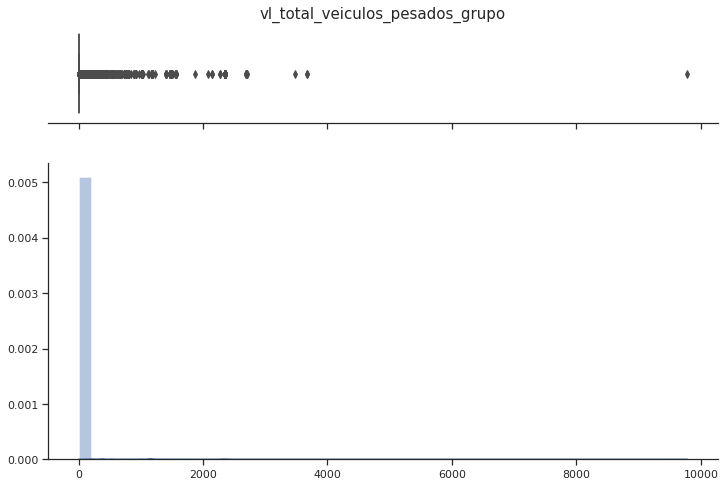

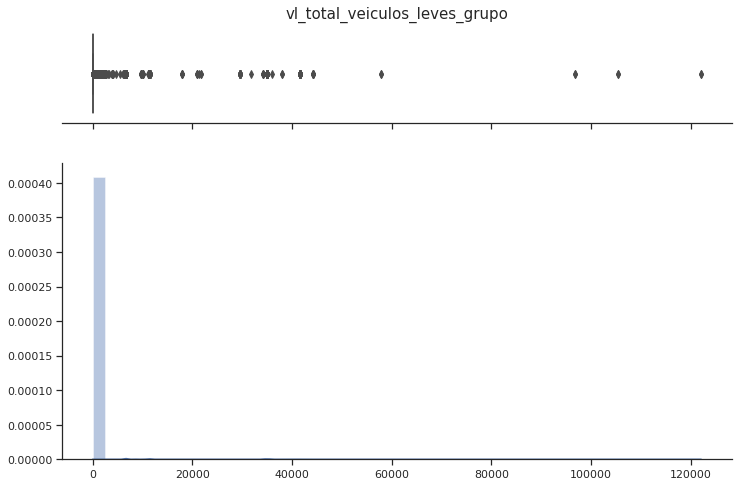

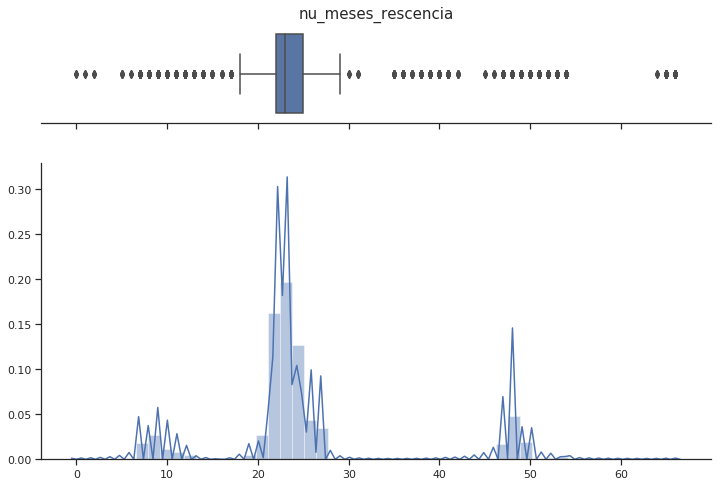

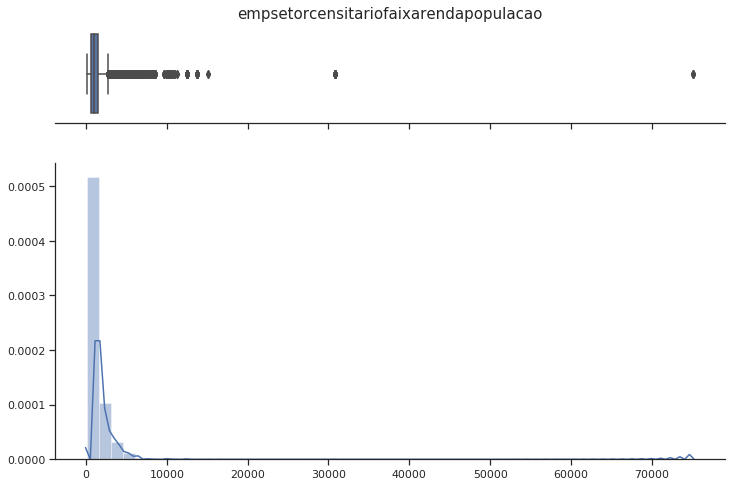

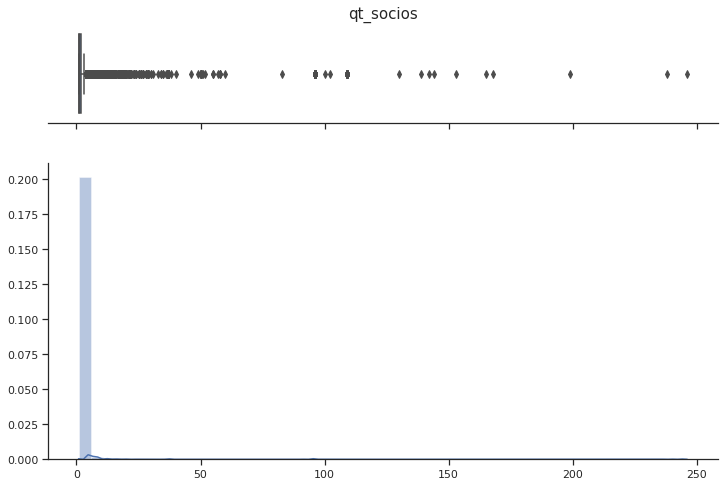

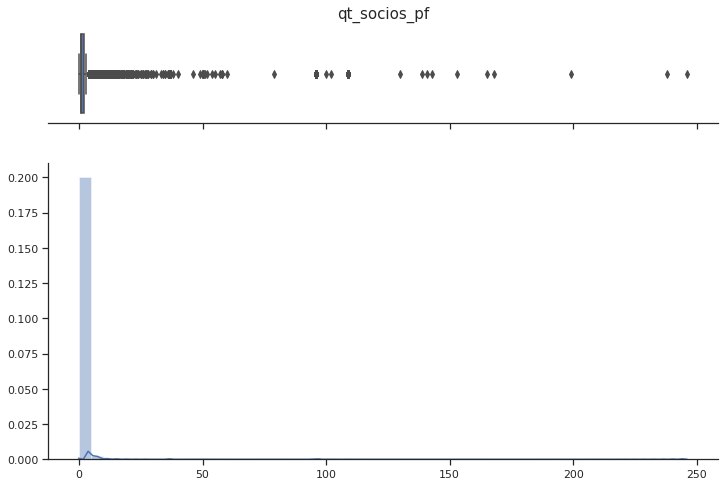

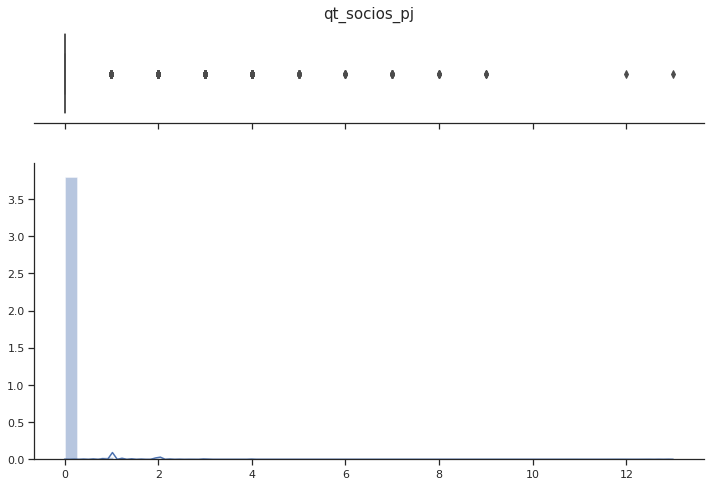

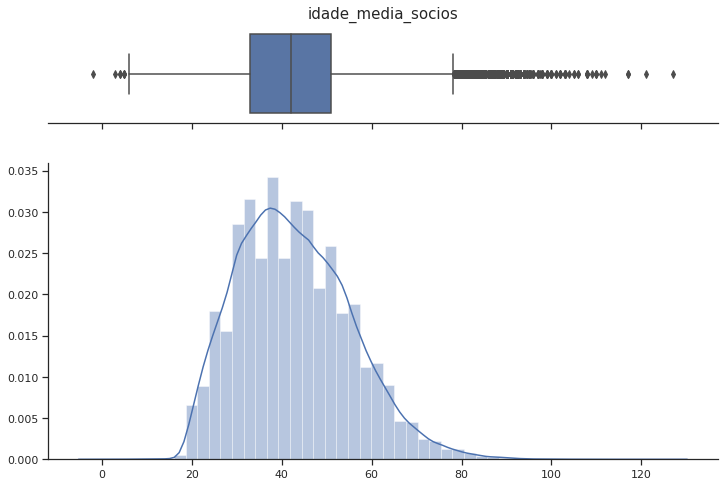

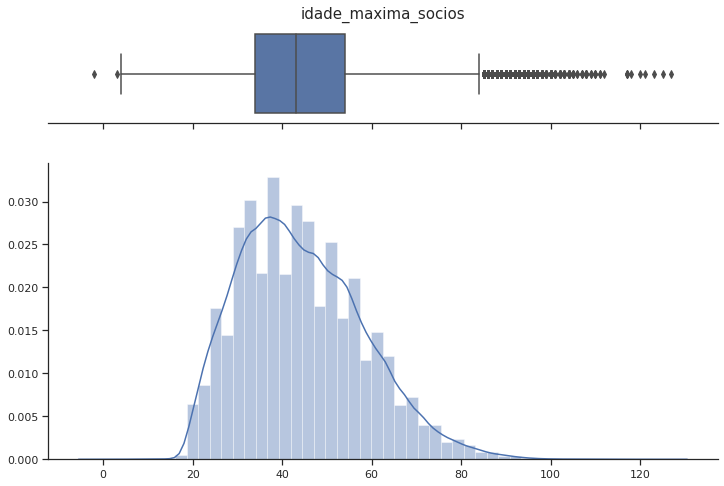

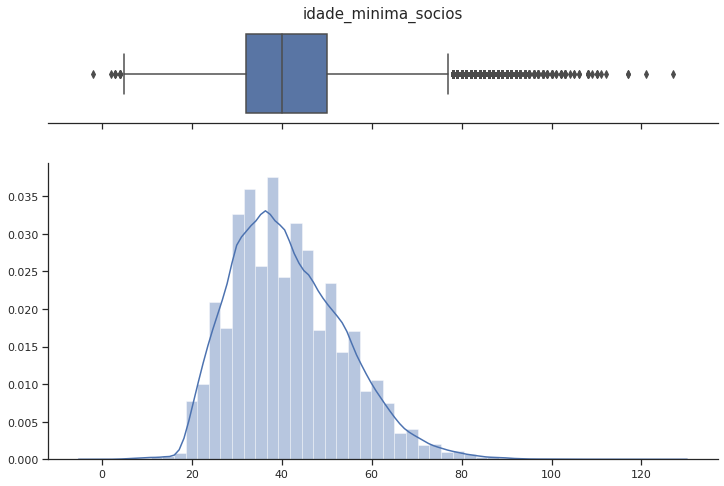

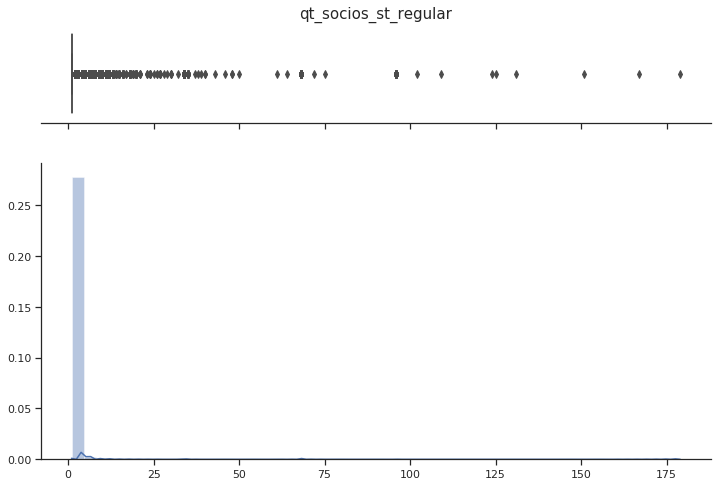

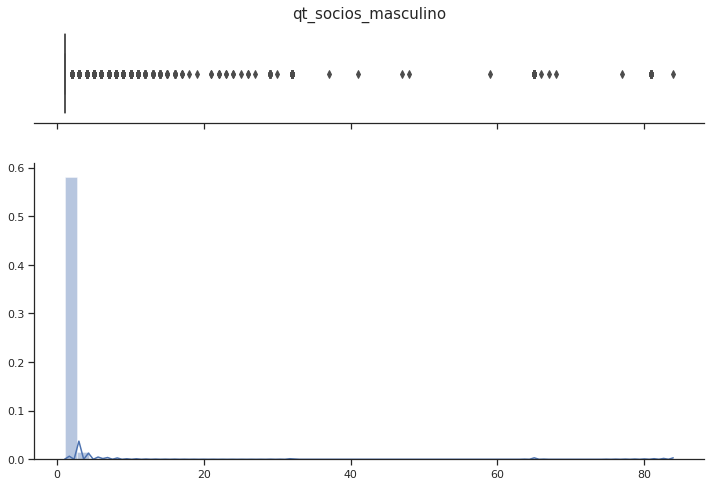

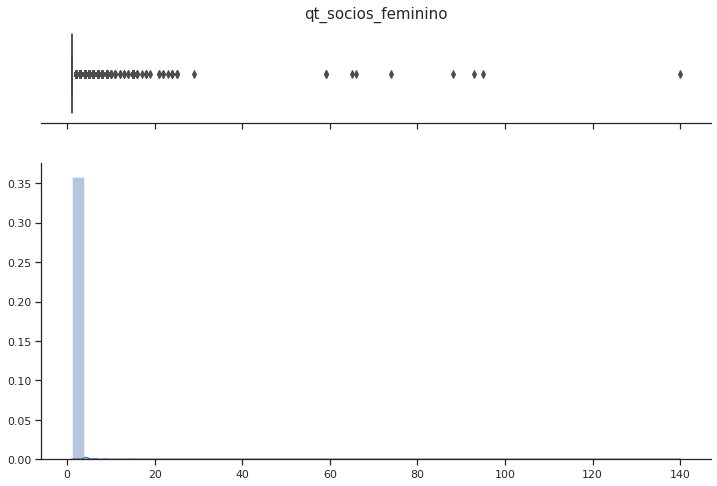

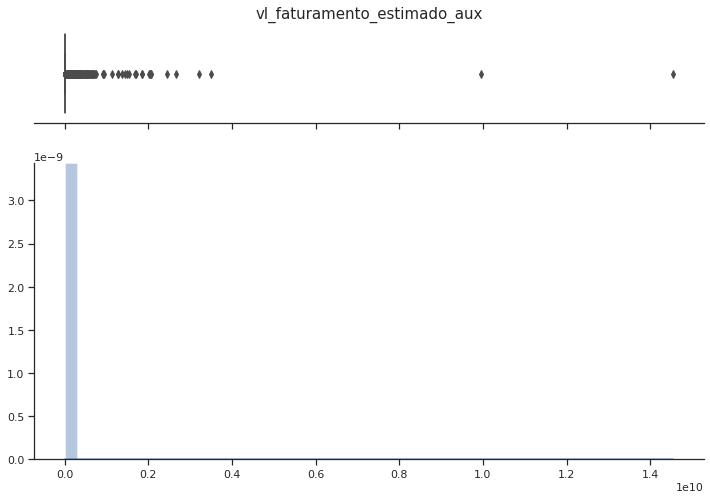

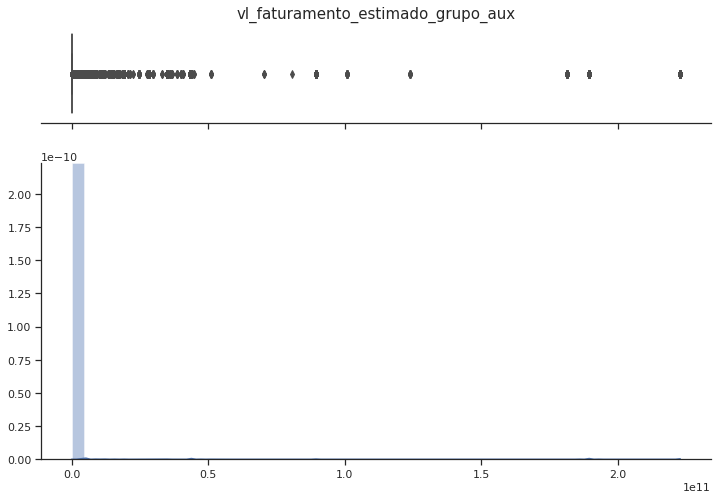

In [47]:
# analisando distribuição das features numéricas
plot_box_hist(df_null)

Existem muitos outliers nas features, aplicando IQR

In [48]:
iqr_df = pd.DataFrame(columns=['feature', 'down', 'up'])

x=0

for col in df_null:
    Q1 = (df_null[col].quantile(0.25))
    Q3 = (df_null[col].quantile(0.75))
    
    IQR = (Q3 - Q1)
    down = ((Q1 - 1.5*IQR))
    up =  ((Q3 + 1.5*IQR))
    
    # armazenando valores IQR em um dataframe
    iqr_df.loc[x] = [col] + [down] + [up]
    x += 1

iqr_df.set_index('feature')

,down,up
feature,,
vl_total_veiculos_pesados_grupo,0.000,0.000
vl_total_veiculos_leves_grupo,0.000,0.000
nu_meses_rescencia,17.500,29.500
empsetorcensitariofaixarendapopulacao,-594.045,2785.355
qt_socios,-0.500,3.500
qt_socios_pf,-0.500,3.500
qt_socios_pj,0.000,0.000
idade_media_socios,6.000,78.000
idade_maxima_socios,4.000,84.000


- Dropando as features com pouquíssima variação (IQR down e up zerado)
- Removendo outliers

In [49]:
drop_cols = []

x=0

for col in iqr_df:
    # iterando sobre o data set IQR e verificando down e ups zerados
    if iqr_df.loc[x].down == 0 and iqr_df.loc[x].up == 0:
        drop_cols.append(iqr_df.loc[x].feature)
    x +=1
        
drop_cols

['vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo']

In [50]:
# Dropando outliers (com distribuição zero) do dataset de numericos nulos 
df_null.drop(drop_cols, axis=1, inplace=True)
df_market_ok.drop(drop_cols, axis=1, inplace=True)

/home/tiago/.local/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
# checando outliers das features:
# se existir outlier, será aplicado o valor de max ou min
for col in df_null:
    
    # valores IQR
    down = float( iqr_df.loc[ iqr_df.feature == col ].down )
    up   = float( iqr_df.loc[ iqr_df.feature == col ].up )
    
    # desvio padrão
    std_dev = statistics.stdev(df_null[col])    
    
    # trantando em caso de down negativo
    down_value = max(down - std_dev, 0)
    
    # para valores menores que down, aplicando o down menos desvio padrão
    df_null.loc[( df_null[col] < down )] = down_value
    
    # para valores maiores que up, aplicando o up mais desvio padrão
    df_null.loc[( df_null[col] > up )] = up + std_dev
    
df_null.head()

/home/tiago/.local/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/tiago/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/tiago/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux
id,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,26.0,475.73,1.0,1.0,0.0,36.0,36.0,36.0,1.0,1.0,NaN,210000.0,210000.0
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Imprimindo distribuição após o drop de outliers

/home/tiago/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/tiago/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/tiago/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/tiago/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/tiago/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/tiago/minic

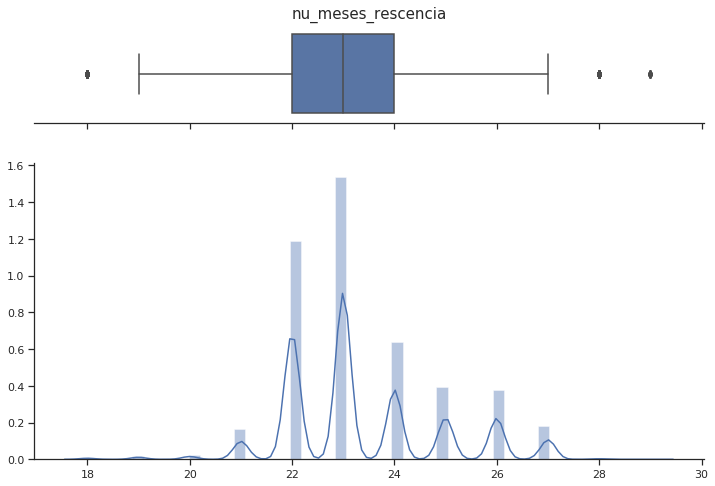

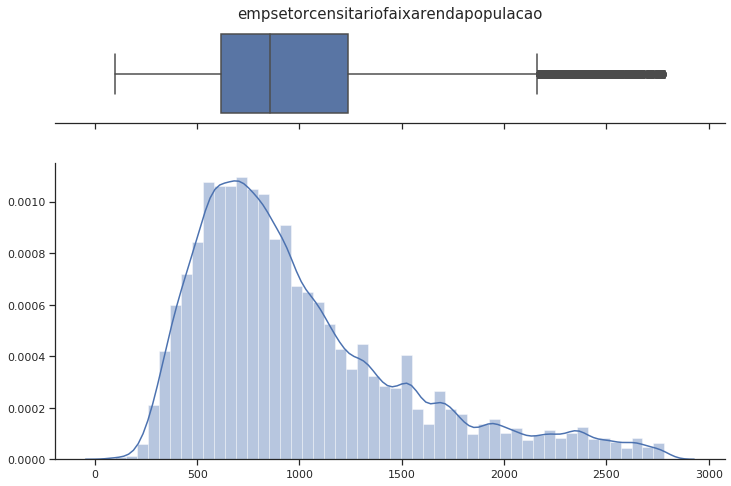

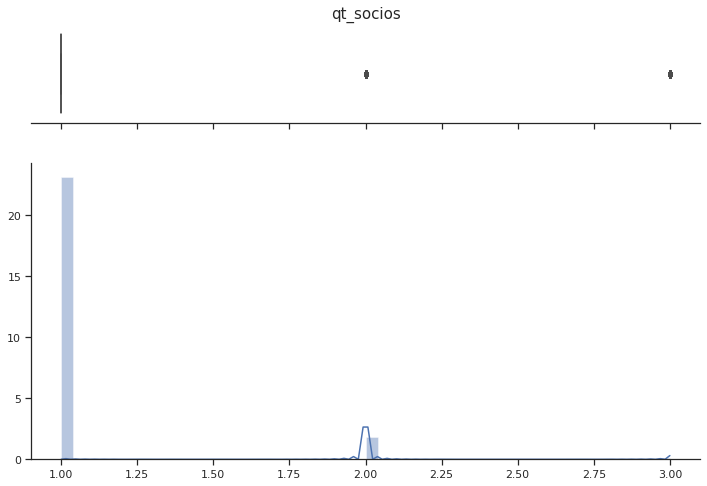

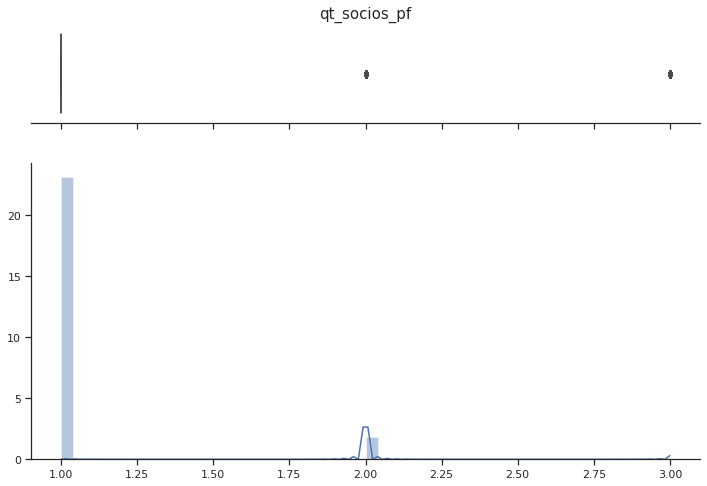

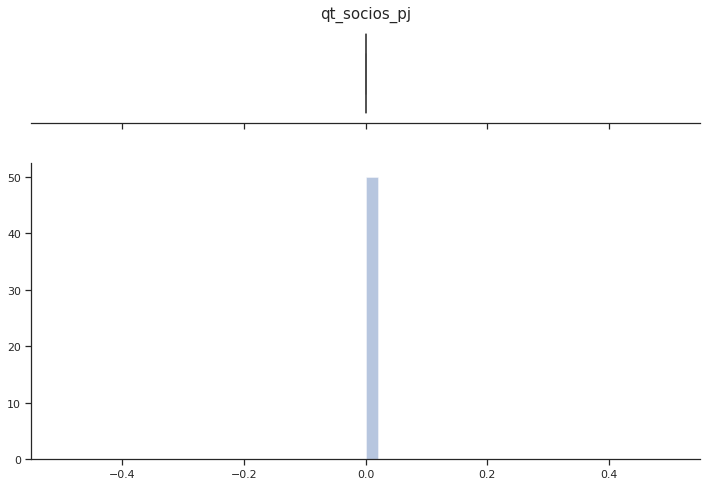

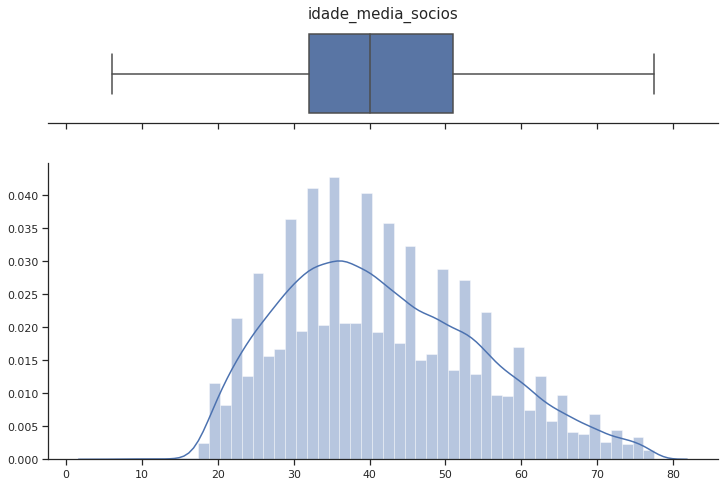

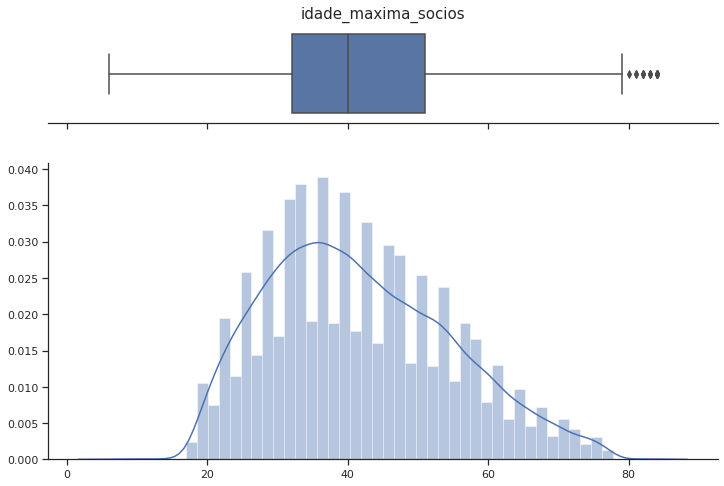

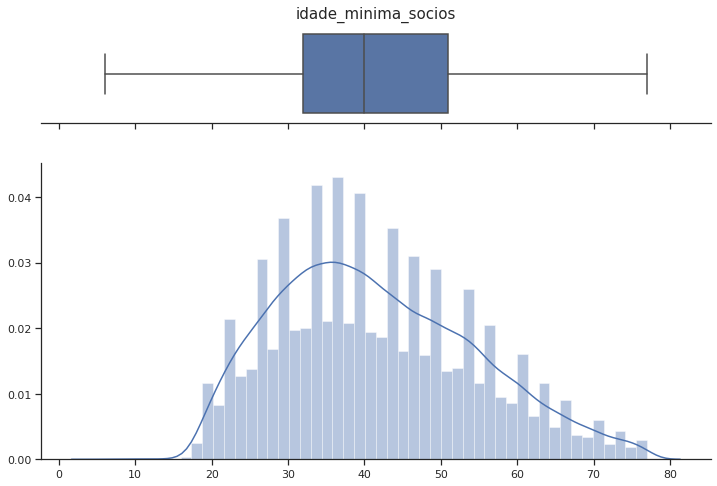

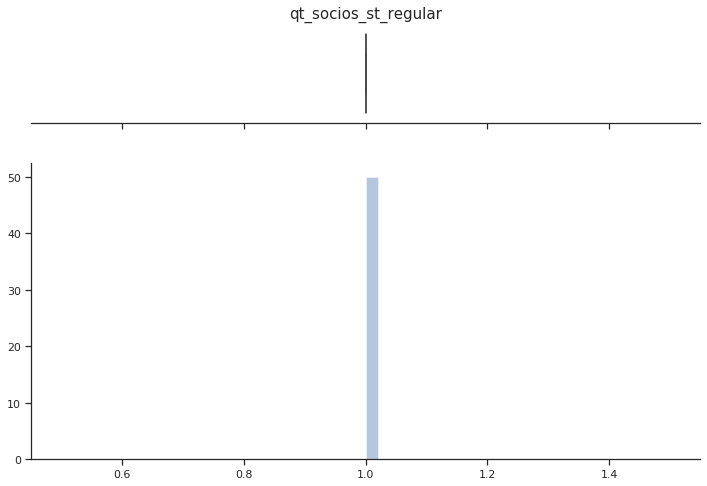

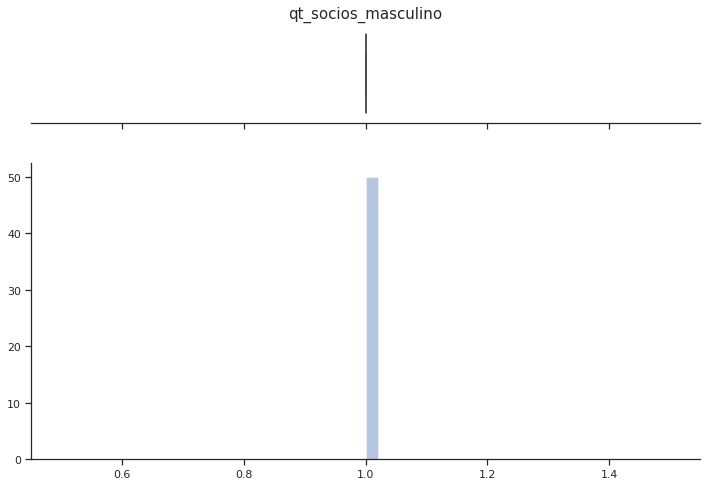

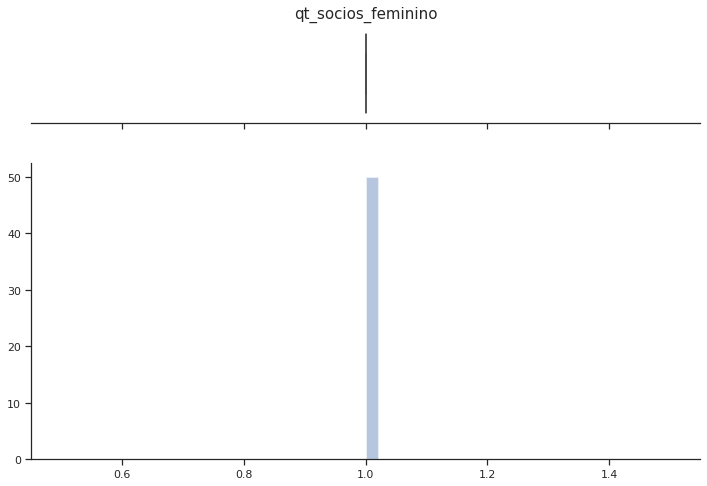

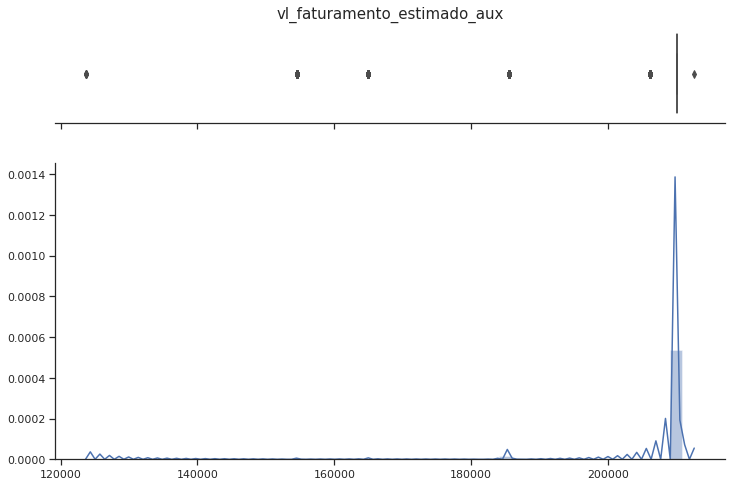

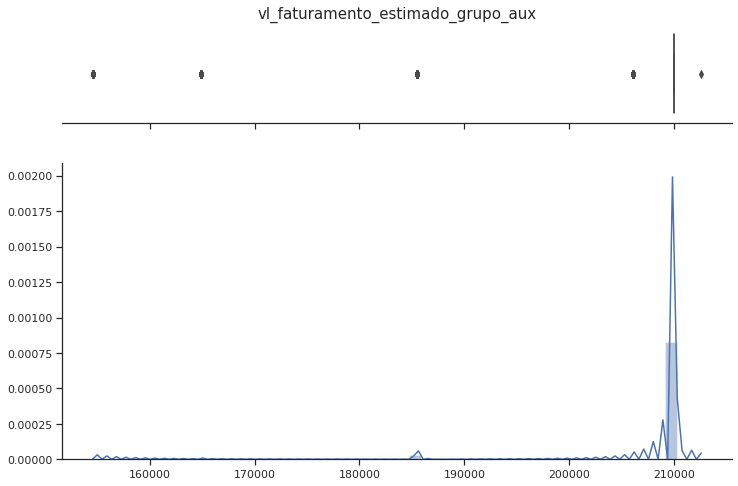

In [52]:
# analisando distribuição das features numéricas
plot_box_hist(df_null)

Analisando a distribuição das features, e estudando o dicionário das features, foram consideradas as estratégias de preenchimento das variáveis da seguinte forma:

In [53]:
df_null.describe()

,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux
count,130384.000000,99777.000000,95834.000000,95834.000000,95834.0,75668.000000,75668.000000,75668.000000,74233.0,43854.0,29496.0,142027.000000,142027.000000
mean,23.347658,997.688158,1.077843,1.077843,0.0,41.591009,41.639702,41.542343,1.0,1.0,1.0,208841.601988,208843.343043
std,1.534176,526.584597,0.278505,0.278505,0.0,12.939743,12.992237,12.923999,0.0,0.0,0.0,6025.239710,6008.037480
min,18.000000,100.000000,1.000000,1.000000,0.0,6.000000,6.000000,6.000000,1.0,1.0,1.0,123638.400000,154548.000000
25%,22.000000,617.720000,1.000000,1.000000,0.0,32.000000,32.000000,32.000000,1.0,1.0,1.0,210000.000000,210000.000000
50%,23.000000,853.870000,1.000000,1.000000,0.0,40.000000,40.000000,40.000000,1.0,1.0,1.0,210000.000000,210000.000000
75%,24.000000,1235.330000,1.000000,1.000000,0.0,51.000000,51.000000,51.000000,1.0,1.0,1.0,210000.000000,210000.000000
max,29.000000,2783.810000,3.000000,3.000000,0.0,77.500000,84.000000,77.000000,1.0,1.0,1.0,212591.970000,212591.970000


In [54]:
# valores que serão preenchidos pela moda
cols_mode = 'qt_socios'

# valores que serão preenchidos com zero
cols_zero = [
    'qt_socios_st_regular',
    'qt_socios_pf',
    'qt_socios_pj',
    'qt_socios_masculino',
    'qt_socios_feminino'
]

# valores que serão preenchidos pela mediana
cols_median = [
    'nu_meses_rescencia',
    'empsetorcensitariofaixarendapopulacao',
    'idade_media_socios',
    'vl_faturamento_estimado_grupo_aux'
]

# features a serem dropadas
drop_cols = [
    'idade_minima_socios',  # possui distribuição quase identica a idade_media_socios
    'idade_maxima_socios',  # possui distribuição quase identica a idade_media_socios
    'vl_faturamento_estimado_aux' # distribuição quase identica a vl_faturamento_estimado_grupo_aux   
]

Preenchendo valores nulos de acordo com a estratégia

In [55]:
# moda

# passando para um numpy para acelerar performance
np_mode = np.array(df_null[cols_mode])
# calculando moda 
mode = stats.mode(np_mode)[0][0]
# preenchendo nulos pela moda
df_null[cols_mode].fillna(mode, inplace = True) 

print(
    f"{cols_mode} possui nulo?:", 
    df_null[cols_mode].isna().any()
)

qt_socios possui nulo?: False


/home/tiago/.local/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [56]:
# zero
for col in cols_zero:
    df_null[col].fillna(0, inplace = True)
    print(
        f"{col} possui nulo?:", 
        df_null[col].isna().any()
    )

qt_socios_st_regular possui nulo?: False
qt_socios_pf possui nulo?: False
qt_socios_pj possui nulo?: False
qt_socios_masculino possui nulo?: False
qt_socios_feminino possui nulo?: False


In [57]:
# mediana
for col in cols_median:
    # passando para um numpy para acelerar performance
    np_median = np.array(df_null[col].dropna())
    # calculando mediana
    median = statistics.median(np_median)
    # aplicando mediana nos nulos
    df_null[col].fillna(median, inplace=True)
    print(
        f"{col} possui nulo?:", 
        df_null[col].isna().any()
    )


nu_meses_rescencia possui nulo?: False
empsetorcensitariofaixarendapopulacao possui nulo?: False
idade_media_socios possui nulo?: False
vl_faturamento_estimado_grupo_aux possui nulo?: False


In [58]:
# colunas a serem dropadas
df_null.drop(drop_cols, axis=1, inplace=True)
df_market_ok.drop(drop_cols, axis=1, inplace=True)

/home/tiago/.local/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Verificando se existem nulos no dataset `df_null`

In [59]:
df_null.isna().any()

nu_meses_rescencia                       False
empsetorcensitariofaixarendapopulacao    False
qt_socios                                False
qt_socios_pf                             False
qt_socios_pj                             False
idade_media_socios                       False
qt_socios_st_regular                     False
qt_socios_masculino                      False
qt_socios_feminino                       False
vl_faturamento_estimado_grupo_aux        False
dtype: bool

In [60]:
# dropando colunas do dataset null, pois serão substituídas
df_market_ok.drop(df_null.columns, axis=1, inplace=True)

# merge dataset de nulos com o dataset ok
df_market_ok = pd.merge(df_market_ok, df_null, left_index=True, right_index=True)

df_market_ok.isna().any()

idade_empresa_anos                         False
qt_filiais                                 False
fl_matriz                                  False
fl_mei                                     False
fl_email                                   False
fl_telefone                                False
fl_veiculo                                 False
fl_optante_simples                         False
fl_optante_simei                           False
fl_passivel_iss                            False
fl_rm                                      False
sg_uf_lbl                                  False
natureza_juridica_macro_lbl                False
setor_lbl                                  False
idade_emp_cat_lbl                          False
nm_segmento_lbl                            False
sg_uf_matriz_lbl                           False
de_saude_tributaria_lbl                    False
de_saude_rescencia_lbl                     False
de_nivel_atividade_lbl                     False
nm_meso_regiao_lbl  

### Checkpoint 4: Preenchimento de nulos
- Valores preenchidos de acordo com a distribuição das features
- Drop de algumas features de acordo com interpretação do dicionário e também por representarem o mesmo valor

In [61]:
# Guardando market ok em csv
# df_market_ok.to_csv("marketok.csv")

In [62]:
df_market_ok.head()

,idade_empresa_anos,qt_filiais,fl_matriz,fl_mei,fl_email,fl_telefone,fl_veiculo,fl_optante_simples,fl_optante_simei,fl_passivel_iss,fl_rm,sg_uf_lbl,natureza_juridica_macro_lbl,setor_lbl,idade_emp_cat_lbl,nm_segmento_lbl,sg_uf_matriz_lbl,de_saude_tributaria_lbl,de_saude_rescencia_lbl,de_nivel_atividade_lbl,nm_meso_regiao_lbl,de_faixa_faturamento_estimado_grupo_lbl,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,vl_faturamento_estimado_grupo_aux
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,14.457534,0,1,0,1,1,0,1,0,1,1,4,2,2,1,10,19,4,0,0,6,2,23.0,853.87,1.0,0.0,0.0,40.0,0.0,0.0,0.0,210000.0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1.463014,0,1,1,1,1,0,0,0,1,1,3,5,4,0,3,16,2,1,1,4,10,23.0,853.87,1.0,0.0,0.0,40.0,0.0,0.0,0.0,210000.0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,7.093151,0,1,1,0,1,0,1,1,1,1,1,5,4,3,20,2,0,0,2,2,1,23.0,853.87,1.0,0.0,0.0,40.0,0.0,0.0,0.0,210000.0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,6.512329,0,1,0,1,1,0,1,0,1,1,1,5,4,3,17,2,0,0,2,2,10,26.0,475.73,1.0,1.0,0.0,36.0,1.0,1.0,0.0,210000.0
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,3.200000,0,1,0,1,1,0,1,0,1,1,4,5,4,0,8,19,4,0,0,6,10,23.0,853.87,1.0,0.0,0.0,40.0,0.0,0.0,0.0,210000.0


### Padronizando/Normalizando features numéricas

In [63]:
# nao sei pq, mas isso aqui precisa rodar 2x pra funcionar ¯\_(ツ)_/¯

i=0

while(i<2):
    # atualizando lista de features numerics
    for col in numeric_cols:
        if(col not in df_market_ok.columns):
            numeric_cols.remove(col)
    i += 1
    
numeric_cols    

['idade_empresa_anos',
 'nu_meses_rescencia',
 'empsetorcensitariofaixarendapopulacao',
 'qt_socios',
 'qt_socios_pf',
 'qt_socios_pj',
 'idade_media_socios',
 'qt_socios_st_regular',
 'qt_socios_masculino',
 'qt_socios_feminino',
 'vl_faturamento_estimado_grupo_aux',
 'qt_filiais']

In [64]:
describe = df_market_ok[numeric_cols].describe()
describe

,idade_empresa_anos,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,vl_faturamento_estimado_grupo_aux,qt_filiais
count,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.0,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000
mean,9.948677,23.098051,884.910031,1.016137,0.223436,0.0,40.260413,0.160574,0.094861,0.063803,209644.652329,28.737044
std,9.615664,0.829635,251.689286,0.130671,0.454956,0.0,5.268011,0.367138,0.293023,0.244402,3372.572623,468.626094
min,0.016438,18.000000,100.000000,1.000000,0.000000,0.0,6.000000,0.000000,0.000000,0.000000,154548.000000,0.000000
25%,2.756164,23.000000,853.870000,1.000000,0.000000,0.0,40.000000,0.000000,0.000000,0.000000,210000.000000,0.000000
50%,6.704110,23.000000,853.870000,1.000000,0.000000,0.0,40.000000,0.000000,0.000000,0.000000,210000.000000,0.000000
75%,14.465753,23.000000,853.870000,1.000000,0.000000,0.0,40.000000,0.000000,0.000000,0.000000,210000.000000,0.000000
max,106.432877,29.000000,2783.810000,3.000000,3.000000,0.0,77.500000,1.000000,1.000000,1.000000,212591.970000,9647.000000


- Para features com desvio padrão **igual ou menor que um** será aplicada a normalização
- Para o restante, será aplicado a padronização

In [65]:
# dataset para guardar valores numéricos antes da normalização
df_num_mkt_bkp = pd.DataFrame()

**NORMALIZAÇÃO**

In [66]:
# features com desvio padrão pequeno
describe_std = describe.loc['std']

# considerando desvio padrão menor ou igual a 1
describe_std = describe_std[describe_std <= 1]

# colunas a serem normalizadas
normalize_cols = list(describe_std.index)
normalize_cols

['nu_meses_rescencia',
 'qt_socios',
 'qt_socios_pf',
 'qt_socios_pj',
 'qt_socios_st_regular',
 'qt_socios_masculino',
 'qt_socios_feminino']

In [67]:
# aplicando normalizaçãomin_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

for col in normalize_cols:
    col_norm = col + '_norm'
    
    # aplicando normalização no dataset market ok
    normalized = min_max_scaler.fit_transform(np.array(df_market_ok[col]).reshape(-1, 1))
    df_market_ok[col_norm] = normalized
    
    # guardando valor numérico antes da normalização
    df_num_mkt_bkp[col] = df_market_ok[col].copy()    
    
    # dropando valor original do dataset market ok
    df_market_ok.drop(col, axis=1, inplace=True)
    
df_market_ok.head()

,idade_empresa_anos,qt_filiais,fl_matriz,fl_mei,fl_email,fl_telefone,fl_veiculo,fl_optante_simples,fl_optante_simei,fl_passivel_iss,fl_rm,sg_uf_lbl,natureza_juridica_macro_lbl,setor_lbl,idade_emp_cat_lbl,nm_segmento_lbl,sg_uf_matriz_lbl,de_saude_tributaria_lbl,de_saude_rescencia_lbl,de_nivel_atividade_lbl,nm_meso_regiao_lbl,de_faixa_faturamento_estimado_grupo_lbl,empsetorcensitariofaixarendapopulacao,idade_media_socios,vl_faturamento_estimado_grupo_aux,nu_meses_rescencia_norm,qt_socios_norm,qt_socios_pf_norm,qt_socios_pj_norm,qt_socios_st_regular_norm,qt_socios_masculino_norm,qt_socios_feminino_norm
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,14.457534,0,1,0,1,1,0,1,0,1,1,4,2,2,1,10,19,4,0,0,6,2,853.87,40.0,210000.0,0.454545,0.0,0.000000,0.0,0.0,0.0,0.0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1.463014,0,1,1,1,1,0,0,0,1,1,3,5,4,0,3,16,2,1,1,4,10,853.87,40.0,210000.0,0.454545,0.0,0.000000,0.0,0.0,0.0,0.0
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,7.093151,0,1,1,0,1,0,1,1,1,1,1,5,4,3,20,2,0,0,2,2,1,853.87,40.0,210000.0,0.454545,0.0,0.000000,0.0,0.0,0.0,0.0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,6.512329,0,1,0,1,1,0,1,0,1,1,1,5,4,3,17,2,0,0,2,2,10,475.73,36.0,210000.0,0.727273,0.0,0.333333,0.0,1.0,1.0,0.0
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,3.200000,0,1,0,1,1,0,1,0,1,1,4,5,4,0,8,19,4,0,0,6,10,853.87,40.0,210000.0,0.454545,0.0,0.000000,0.0,0.0,0.0,0.0


**PADRONIZAÇÃO**

In [68]:
# gerando lista de colunas a serem padronizadas
standardize_cols = []

for col in numeric_cols:
    if col not in normalize_cols:
        standardize_cols.append(col)
        
standardize_cols

['idade_empresa_anos',
 'empsetorcensitariofaixarendapopulacao',
 'idade_media_socios',
 'vl_faturamento_estimado_grupo_aux',
 'qt_filiais']

In [69]:
for col in standardize_cols:
    col_norm = col + '_standard'
    
    # aplicando padronização no dataset market ok
    standardized = StandardScaler().fit_transform(np.array(df_market_ok[col]).reshape(-1, 1))
    df_market_ok[col_norm] = standardized
    
    # guardando valor numérico antes da padronização
    df_num_mkt_bkp[col] = df_market_ok[col].copy()    
    
    # dropando valor original do dataset market ok
    df_market_ok.drop(col, axis=1, inplace=True)
    
df_market_ok.head()

,fl_matriz,fl_mei,fl_email,fl_telefone,fl_veiculo,fl_optante_simples,fl_optante_simei,fl_passivel_iss,fl_rm,sg_uf_lbl,natureza_juridica_macro_lbl,setor_lbl,idade_emp_cat_lbl,nm_segmento_lbl,sg_uf_matriz_lbl,de_saude_tributaria_lbl,de_saude_rescencia_lbl,de_nivel_atividade_lbl,nm_meso_regiao_lbl,de_faixa_faturamento_estimado_grupo_lbl,nu_meses_rescencia_norm,qt_socios_norm,qt_socios_pf_norm,qt_socios_pj_norm,qt_socios_st_regular_norm,qt_socios_masculino_norm,qt_socios_feminino_norm,idade_empresa_anos_standard,empsetorcensitariofaixarendapopulacao_standard,idade_media_socios_standard,vl_faturamento_estimado_grupo_aux_standard,qt_filiais_standard
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,1,0,1,1,0,1,0,1,1,4,2,2,1,10,19,4,0,0,6,2,0.454545,0.0,0.000000,0.0,0.0,0.0,0.0,0.468908,-0.123327,-0.049433,0.105364,-0.061322
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1,1,1,1,0,0,0,1,1,3,5,4,0,3,16,2,1,1,4,10,0.454545,0.0,0.000000,0.0,0.0,0.0,0.0,-0.882484,-0.123327,-0.049433,0.105364,-0.061322
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,1,1,0,1,0,1,1,1,1,1,5,4,3,20,2,0,0,2,2,1,0.454545,0.0,0.000000,0.0,0.0,0.0,0.0,-0.296966,-0.123327,-0.049433,0.105364,-0.061322
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,1,0,1,1,0,1,0,1,1,1,5,4,3,17,2,0,0,2,2,10,0.727273,0.0,0.333333,0.0,1.0,1.0,0.0,-0.357370,-1.625737,-0.808734,0.105364,-0.061322
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,1,0,1,1,0,1,0,1,1,4,5,4,0,8,19,4,0,0,6,10,0.454545,0.0,0.000000,0.0,0.0,0.0,0.0,-0.701843,-0.123327,-0.049433,0.105364,-0.061322


In [70]:
df_market_ok.shape

(462298, 32)

In [71]:
df_market_ok.shape

(462298, 32)

### Setando o target

In [72]:
df_port1  = pd.read_csv('portfolio1.csv', usecols=['id'])
df_port2  = pd.read_csv('portfolio2.csv', usecols=['id'])
df_port3  = pd.read_csv('portfolio3.csv', usecols=['id'])

In [73]:
def set_target(row_id):
    
    if  row_id in np.array(df_port1.id) and \
        row_id in np.array(df_port2.id) and \
        row_id in np.array(df_port3.id):
        return 7
    
    elif row_id in np.array(df_port1.id) and \
         row_id in np.array(df_port2.id):    
        return 6
    
    elif row_id in np.array(df_port1.id) and \
         row_id in np.array(df_port3.id):    
        return 5
    
    elif row_id in np.array(df_port2.id) and \
         row_id in np.array(df_port3.id):    
        return 4
    
    elif row_id in np.array(df_port3.id):   
        return 3
    
    elif row_id in np.array(df_port2.id):   
        return 2
    
    elif row_id in np.array(df_port1.id):   
        return 1
    
    else:
        return None   

In [74]:
# para acelerar performance
ids_mkt = np.array(df_market_ok.index)

In [75]:
df_market_ok['target'] = list(map(lambda s: set_target(s), ids_mkt))
df_market_ok.target.unique()

array([nan,  1.,  2.,  3.,  4.])

In [76]:
df_market_ok.head()

,fl_matriz,fl_mei,fl_email,fl_telefone,fl_veiculo,fl_optante_simples,fl_optante_simei,fl_passivel_iss,fl_rm,sg_uf_lbl,natureza_juridica_macro_lbl,setor_lbl,idade_emp_cat_lbl,nm_segmento_lbl,sg_uf_matriz_lbl,de_saude_tributaria_lbl,de_saude_rescencia_lbl,de_nivel_atividade_lbl,nm_meso_regiao_lbl,de_faixa_faturamento_estimado_grupo_lbl,nu_meses_rescencia_norm,qt_socios_norm,qt_socios_pf_norm,qt_socios_pj_norm,qt_socios_st_regular_norm,qt_socios_masculino_norm,qt_socios_feminino_norm,idade_empresa_anos_standard,empsetorcensitariofaixarendapopulacao_standard,idade_media_socios_standard,vl_faturamento_estimado_grupo_aux_standard,qt_filiais_standard,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,1,0,1,1,0,1,0,1,1,4,2,2,1,10,19,4,0,0,6,2,0.454545,0.0,0.000000,0.0,0.0,0.0,0.0,0.468908,-0.123327,-0.049433,0.105364,-0.061322,NaN
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1,1,1,1,0,0,0,1,1,3,5,4,0,3,16,2,1,1,4,10,0.454545,0.0,0.000000,0.0,0.0,0.0,0.0,-0.882484,-0.123327,-0.049433,0.105364,-0.061322,NaN
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,1,1,0,1,0,1,1,1,1,1,5,4,3,20,2,0,0,2,2,1,0.454545,0.0,0.000000,0.0,0.0,0.0,0.0,-0.296966,-0.123327,-0.049433,0.105364,-0.061322,NaN
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,1,0,1,1,0,1,0,1,1,1,5,4,3,17,2,0,0,2,2,10,0.727273,0.0,0.333333,0.0,1.0,1.0,0.0,-0.357370,-1.625737,-0.808734,0.105364,-0.061322,NaN
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,1,0,1,1,0,1,0,1,1,4,5,4,0,8,19,4,0,0,6,10,0.454545,0.0,0.000000,0.0,0.0,0.0,0.0,-0.701843,-0.123327,-0.049433,0.105364,-0.061322,NaN


### Separando datasets
Treino e teste

In [77]:
# Separando dataset de portfolios
df_train = df_market_ok[df_market_ok.target.notnull()]
df_train.shape

(1278, 33)

### Aplicando RFE
Para redução de dimensionalidade

In [78]:
perc_features_rfe_select = 0.7

qty_features_to_select = round(df_train.shape[1] * perc_features_rfe_select)

In [79]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
rfe = RFE(model, n_features_to_select=qty_features_to_select)  

train_rfe = rfe.fit_transform(df_train.drop('target', axis=1), df_train.target.values.ravel())  

model.fit(train_rfe, df_train.target.values.ravel())

# Imprimindo as selecionadas
temp = pd.Series(rfe.support_, index = df_train.drop('target', axis=1).columns)
selected_features_rfe = temp[temp==True].index

rfe_features = list(selected_features_rfe)

print('\nTotal de principais features:')
print(len(rfe_features))
print('\nPrincipais features são:')
print(rfe_features)

/home/tiago/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/tiago/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/tiago/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/tiago/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/tiago/.local/l


Total de principais features:
23

Principais features são:
['fl_matriz', 'fl_mei', 'fl_email', 'fl_telefone', 'fl_veiculo', 'fl_optante_simples', 'fl_optante_simei', 'fl_passivel_iss', 'fl_rm', 'natureza_juridica_macro_lbl', 'setor_lbl', 'de_saude_tributaria_lbl', 'de_saude_rescencia_lbl', 'de_nivel_atividade_lbl', 'de_faixa_faturamento_estimado_grupo_lbl', 'nu_meses_rescencia_norm', 'qt_socios_pf_norm', 'qt_socios_st_regular_norm', 'qt_socios_masculino_norm', 'idade_empresa_anos_standard', 'empsetorcensitariofaixarendapopulacao_standard', 'vl_faturamento_estimado_grupo_aux_standard', 'qt_filiais_standard']


/home/tiago/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/tiago/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/tiago/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/tiago/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/tiago/.local/l

### Aplicando hot encode
Nas features com label encode

In [80]:
# Verificando quais são as features do tipo object que são relevantes de acordo com o RFE
obj_lbl_cols = []

for col in df_market_obj.columns:
    if col in rfe_features:
        obj_lbl_cols.append(col)
        
obj_cols = np.char.replace(obj_lbl_cols, '_lbl', '')
obj_cols = list(obj_cols)
obj_cols

['natureza_juridica_macro',
 'setor',
 'de_saude_tributaria',
 'de_saude_rescencia',
 'de_nivel_atividade',
 'de_faixa_faturamento_estimado_grupo']

In [81]:
df_encoded = pd.get_dummies(df_mkt_obj_bkp[obj_cols]).copy() 
df_encoded.head()

,natureza_juridica_macro_ADMINISTRACAO PUBLICA,natureza_juridica_macro_CARGO POLITICO,natureza_juridica_macro_ENTIDADES EMPRESARIAIS,natureza_juridica_macro_ENTIDADES SEM FINS LUCRATIVOS,natureza_juridica_macro_INSTITUICOES EXTRATERRITORIAIS,natureza_juridica_macro_OUTROS,natureza_juridica_macro_PESSOAS FISICAS,setor_AGROPECUARIA,setor_COMERCIO,setor_CONSTRUÇÃO CIVIL,setor_INDUSTRIA,setor_SERVIÇO,de_saude_tributaria_AMARELO,de_saude_tributaria_AZUL,de_saude_tributaria_CINZA,de_saude_tributaria_LARANJA,de_saude_tributaria_VERDE,de_saude_tributaria_VERMELHO,de_saude_rescencia_ACIMA DE 1 ANO,de_saude_rescencia_ATE 1 ANO,de_saude_rescencia_ATE 3 MESES,de_saude_rescencia_ATE 6 MESES,de_saude_rescencia_SEM INFORMACAO,de_nivel_atividade_ALTA,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_nivel_atividade_MUITO BAIXA,de_faixa_faturamento_estimado_grupo_ACIMA DE 1 BILHAO DE REAIS,"de_faixa_faturamento_estimado_grupo_ATE R$ 81.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 1.500.000,01 A R$ 4.800.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 10.000.000,01 A R$ 30.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 100.000.000,01 A R$ 300.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 30.000.000,01 A R$ 100.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 300.000.000,01 A R$ 500.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 360.000,01 A R$ 1.500.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 4.800.000,01 A R$ 10.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS","de_faixa_faturamento_estimado_grupo_DE R$ 81.000,01 A R$ 360.000,00"
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [82]:
# mantendo apenas as features explicadas pelo RFE
X_test = df_market_ok[rfe_features].copy()
X_test.shape

(462298, 23)

In [83]:
# mantendo apenas as features explicadas pelo RFE
X_train = df_train[rfe_features].copy()
X_train['target'] = df_train.target
X_train.shape

(1278, 24)

- Dropando colunas label encode dos dataset

In [84]:
df_market_ok.drop(obj_lbl_cols, axis=1, inplace=True)
df_train.drop(obj_lbl_cols, axis=1, inplace=True)

/home/tiago/.local/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


- Aplicando colunas hot encode que são relevantes por RFE

In [85]:
X_train = pd.merge(X_train, df_encoded, left_index=True, right_index=True)
X_test = pd.merge(X_test, df_encoded, left_index=True, right_index=True)

In [86]:
# Guardando market ok em csv
X_test.to_csv("marketok.csv")

In [87]:
# Guardando dataset de portfolio
X_train.to_csv("portfolio_ok.csv")